In [3]:
#dataframes
import pandas as pd
import h5py
import sys
sys.path.append('../../')
import temporal_functions

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
from numpy import (isscalar, r_, log, around, unique, asarray, zeros,
                   arange, sort, amin, amax, atleast_1d, sqrt, array,
                   compress, pi, exp, ravel, count_nonzero, sin, cos,
                   arctan2, hypot)
import math as m

#plots
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.patches as mpatches
from figurefirst import FigureLayout,mpl_functions
import figurefirst as fifi

from astropy import stats

np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7
colormap = 'bone_r'

In [4]:
## 10 second
folder_path='/home/gadfly/DataAnalysis/data/LagAnalysisPaper/maskedJaleesa/LowRes/'
t1=pd.read_hdf(folder_path+'10.20.20_temporal.hdf')
t2=pd.read_hdf(folder_path+'7.7.21_temporal.hdf')
t3=pd.read_hdf(folder_path+'9.26.21_temporal.hdf')
t4=pd.read_hdf(folder_path+'10.29.21_temporal.hdf')
t5=pd.read_hdf(folder_path+'10.30.21_temporal.hdf')
t6=pd.read_hdf(folder_path+'1.8.22_temporal.hdf')
t7=pd.read_hdf(folder_path+'1.11.22_temporal.hdf')
t8=pd.read_hdf(folder_path+'1.15.22_temporal.hdf')
t9=pd.read_hdf(folder_path+'4.30.22_temporal.hdf')
t10=pd.read_hdf(folder_path+'5.1.22_temporal.hdf')
t11=pd.read_hdf(folder_path+'5.2.22_temporal.hdf')
t12=pd.read_hdf(folder_path+'6.1.22_temporal.hdf')
t13=pd.read_hdf(folder_path+'6.3.22_temporal.hdf')
t14=pd.read_hdf(folder_path+'6.7.22_temporal.hdf')
t15=pd.read_hdf(folder_path+'6.8.22_temporal.hdf')
t16=pd.read_hdf(folder_path+'6.22.22_temporal.hdf')

t1_1=pd.read_hdf(folder_path+'hws_temporal.hdf')
t1_2=pd.read_hdf(folder_path+'lws_temporal.hdf')
t_f=pd.read_hdf(folder_path+'forest_temporal.hdf')
t_desert=pd.read_hdf(folder_path+'desert_temporal.hdf')


t1_1['turb_intensity']=t1_1['speed_std']/t1_1['speed_avg']
t1_2['turb_intensity']=t1_2['speed_std']/t1_2['speed_avg']
t_f['turb_intensity']=t_f['speed_std']/t_f['speed_avg']
t_desert['turb_intensity']=t_desert['speed_std']/t_desert['speed_avg']

print('hws',np.mean(t1_1.turb_intensity))
print('lws',np.mean(t1_2.turb_intensity))
print('desert',np.mean(t_desert.turb_intensity))
print('forest',np.mean(t_f.turb_intensity))

alltemp=[t1,t2,t4,t7,t8,t12,t13,t14,t15,t16] ## without urban

# alltemp=[t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16] ## with urban

for i in range(len(alltemp)):
    alltemp[i]['turb_intensity']=alltemp[i]['speed_std']/alltemp[i]['speed_avg']
    
alltempconcat=pd.concat(alltemp)
alltempconcat=alltempconcat.reset_index(inplace=False)


hws 0.13695991439742758
lws 0.36049355928092397
desert 0.26898192445812114
forest 0.542447812723691


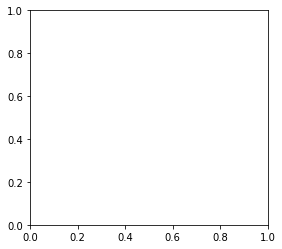

In [16]:
layout = fifi.svg_to_axes.FigureLayout('../../../../Figure/windLagAnalysis.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [17]:
ax=layout.axes[('fig1','ax')]
sns.kdeplot(data=alltempconcat, x='speed_avg', y='direction_std', cmap='bone_r', shade=True, ax=ax,label='All Data', rasterized=True)
sns.kdeplot(data=alltempconcat, x='speed_avg', y='direction_std', cmap='gray', alpha=0.5, levels=[0.04],shade=False, ax=ax, rasterized=True)

ax.scatter(t1_1.speed_avg, t1_1.direction_std, cmap='Blues', s=5, label='HWS', rasterized=True)
ax.scatter(t1_2.speed_avg, t1_2.direction_std, cmap='Oranges', s=5, label='LWS', rasterized=True)
ax.scatter(t_f.speed_avg, t_f.direction_std, cmap='g', s=5, label='Forest', rasterized=True)

# Custom legend patches
all_patch = mpatches.Patch(color=sns.color_palette("bone_r")[2], label='All Data')
hws_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label='HWS')
lws_patch = mpatches.Patch(color=sns.color_palette("Oranges")[2], label='LWS')
forest_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label='Forest')
ax.legend(handles=[all_patch, hws_patch, lws_patch, forest_patch])

ax.set_rasterization_zorder(-20)
ax.grid(False)

ax.set_xlim(-1,7)
ax.set_ylim(-10,90)
ax.set_xlabel('Mean wind speed (m/s)')
ax.set_ylabel('Standard deviation in direction (degrees) ')

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 1,'bottom': 1}, 
                            smart_bounds=True,   
                            xticks=[-1,3,7],
                            yticks=[0,40,80],
                            linewidth=0.5)



mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../../Figure/windLagAnalysis.svg')

/home/gadfly/DataAnalysis/pyresearch/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'rasterized'
  cset = contour_func(
/home/gadfly/DataAnalysis/pyresearch/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'rasterized'
  cset = contour_func(
